In [1]:
try:
    import pymc as pm # For MCMC
except:
    %pip install pymc
    import pymc as pm
try:
    import arviz as az # For MCMC package
except:
    %pip install arviz
    import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
try:
    import corner
except:
    %pip install corner
    import corner

print(pm.__version__)

WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


5.15.1


Data for Donor 1, CD4 cells. I created a new csv file specifically for protein coding genes.

In [15]:
import pandas as pd

file_path = 'datasets/Donor1_CD4_Genes_Protein.csv'

df = pd.read_csv(file_path)

print(df.head())

           Unnamed: 0  MT-ND1  MT-ND2  MT-CO1  MT-CO2  MT-ATP8  MT-ATP6  \
0  AAACCTGCAAACTGTC.1      12       3      23      53       34        3   
1  AAACCTGCACAGCGTC.1       8       4      24      35       10        2   
2  AAACGGGAGACTGGGT.1       7       2      16      30        8        1   
3  AAACGGGAGGTGTTAA.1       3       2      25      23       14        5   
4  AAACGGGCATGGGACA.1       6       3       6      26       14        1   

   MT-CO3  MT-ND3  MT-ND4L  MT-ND4  MT-ND5  MT-ND6  MT-CYB  
0      38       6       20       5       7       7      20  
1      34       3       15       7       6       1      17  
2      19       6       20       3       7       0      15  
3      23       2       13       4       6       3      14  
4      11       4       14       0       2       0       7  


Plot the data:

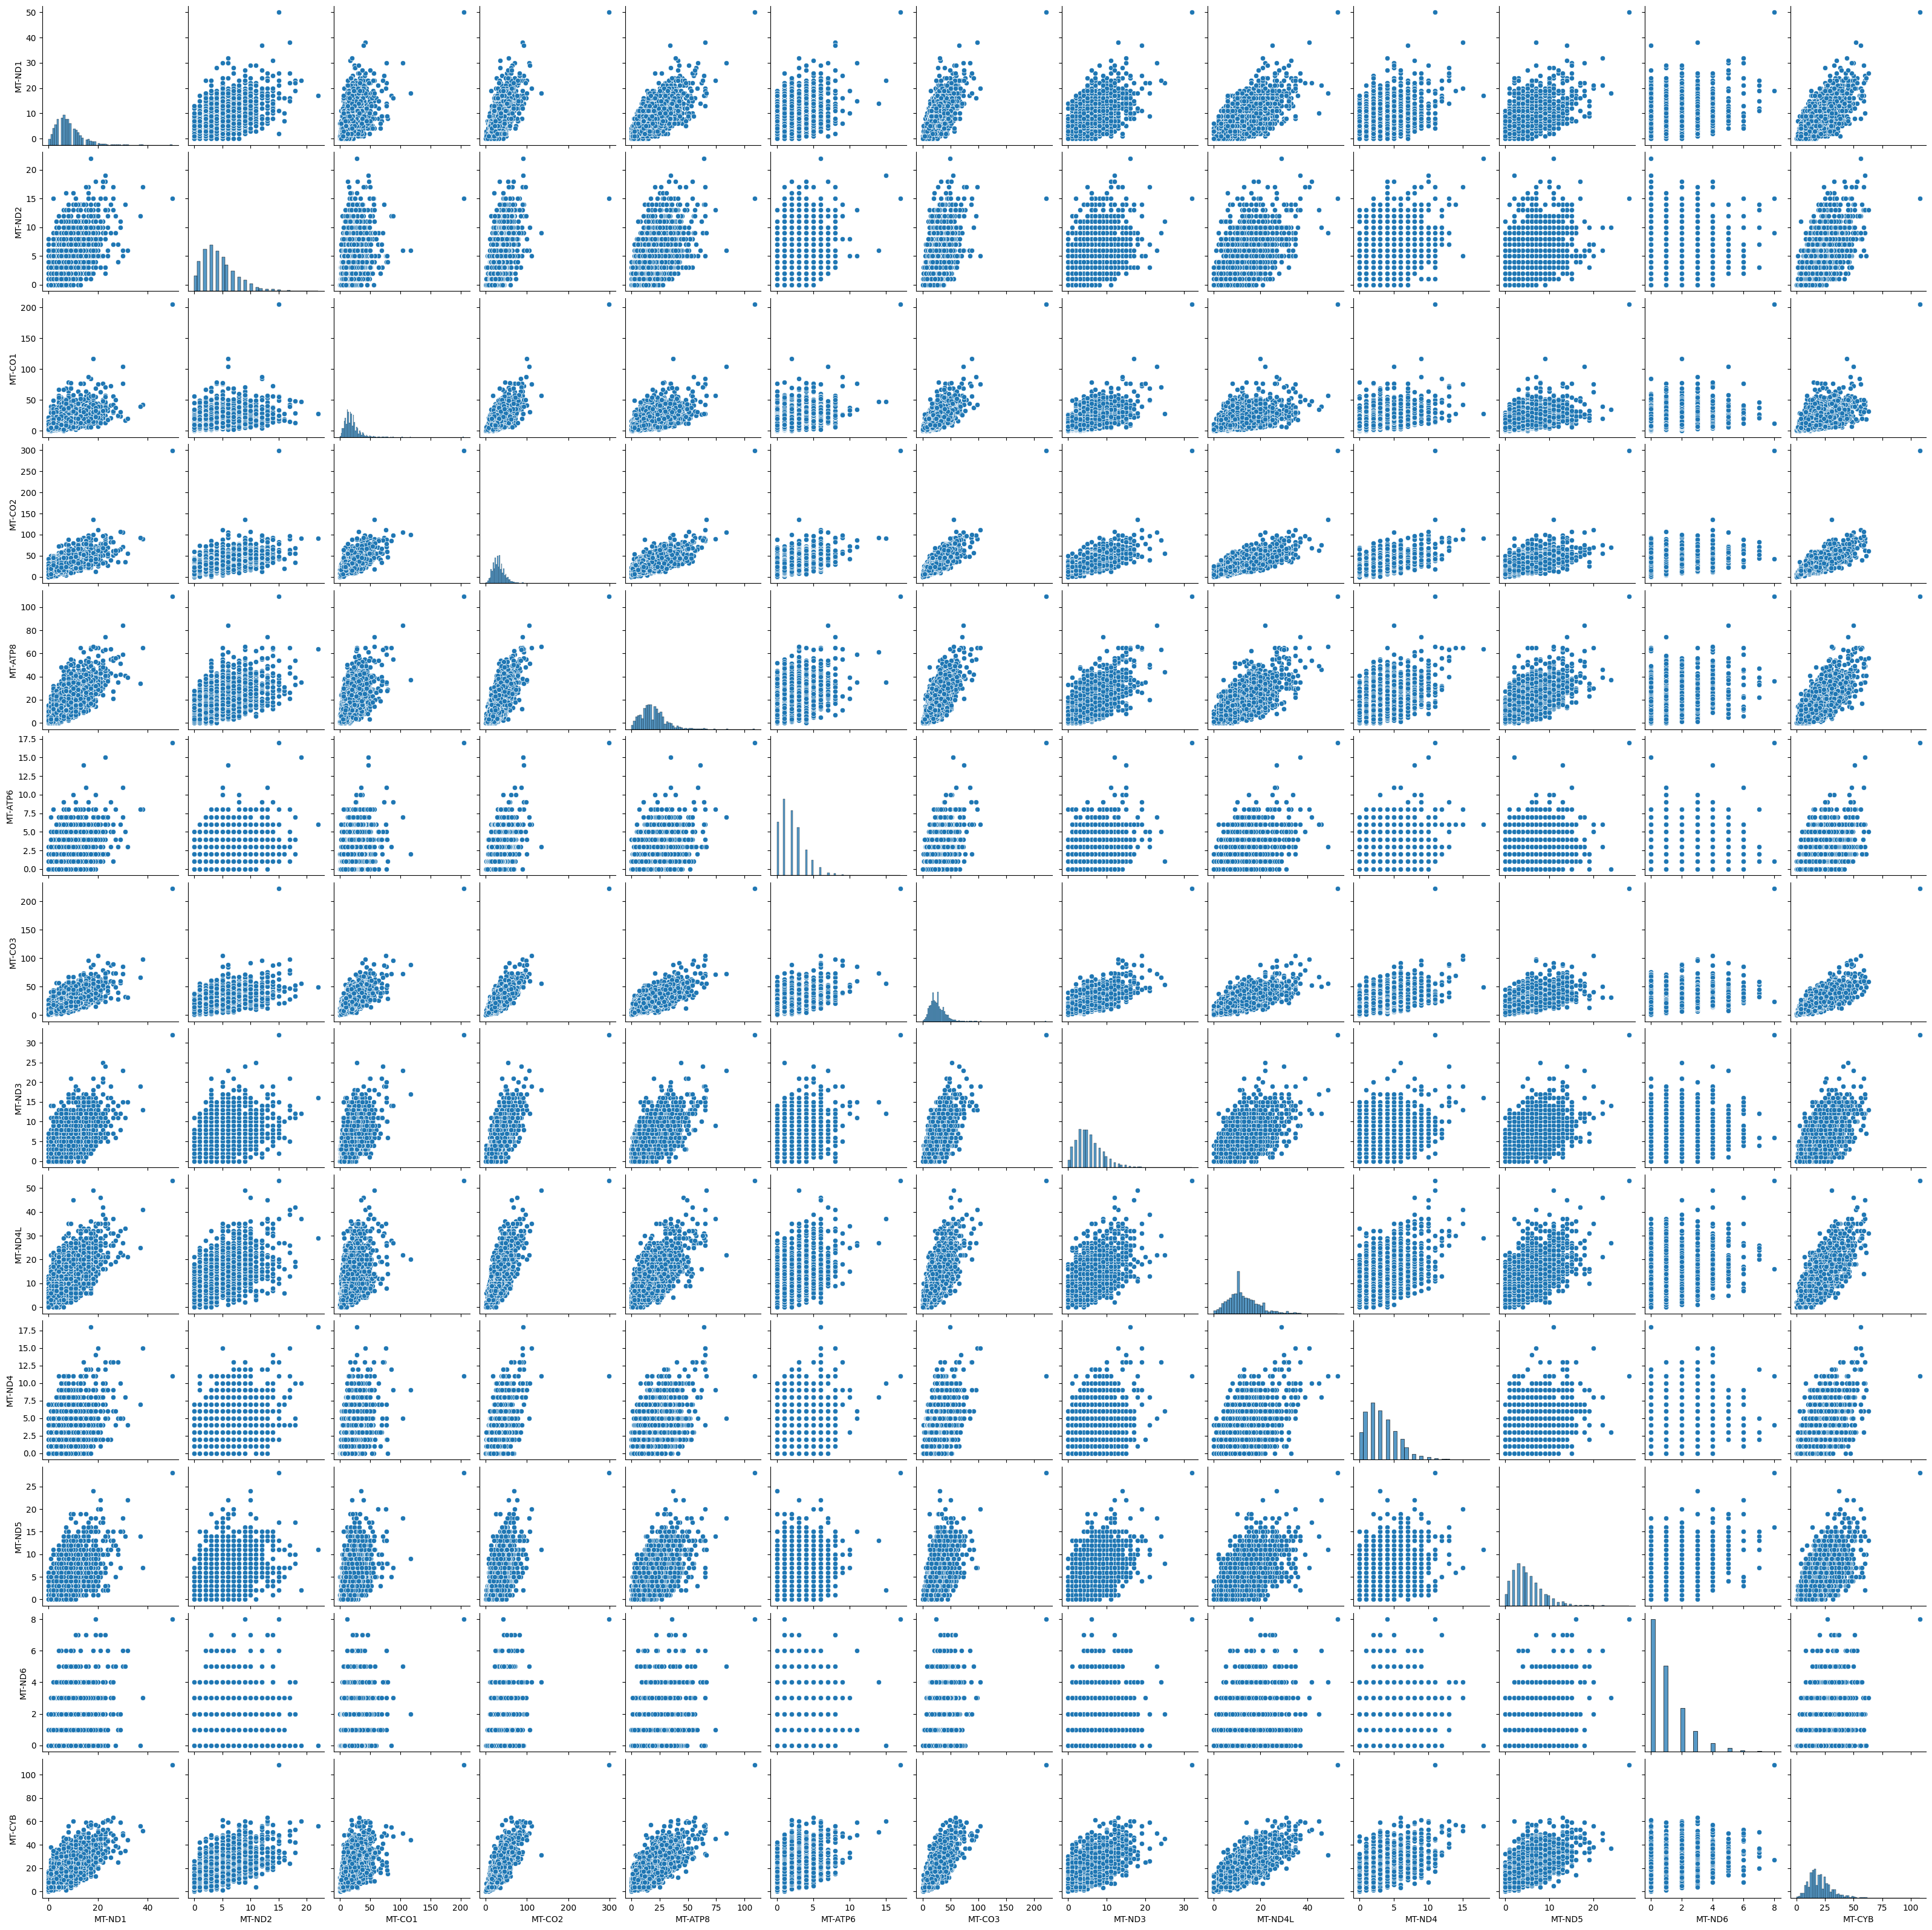

In [17]:
# Create a pairwise scatter plot matrix
sns.pairplot(df)
plt.show()

Assuming the count of genes are independent and each obeys neg binomial distribution

In [16]:
# Convert data to np array
expr = df.to_numpy()[:, 1:]

# Number of cells and genes
num_cells = len(expr)
num_genes = len(expr[0])
print(num_cells, num_genes)



2888 13
